<h1><center>Credit EDA Assignment 

#### Import Libraries

In [297]:
#import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings.
import warnings 
warnings.filterwarnings('ignore')

#Setting row/col size
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

#### Read Datasets

In [298]:
#Reading datasets 
app_data= pd.read_csv("D:/Courses/Upgrad DataScience/Asignments/Assignment_1_Credit_EDA/application_data.csv")
prev_data= pd.read_csv("D:/Courses/Upgrad DataScience/Asignments/Assignment_1_Credit_EDA/previous_application.csv")

In [299]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [300]:
#Checking shape of Data
app_data.shape

(307511, 122)

In [301]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
#Checking info of Data
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### <u>DATA CLEANING<u>

In [303]:
#Checking for null values in the dataset
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### 1. Handling Code-Gender column  from Application Data
<h5><font color='blue'>- Removing the records with "XNA" as Code Gender

In [304]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [305]:
#Drop the "XNA" Code Gender
app_data = app_data[~(app_data.CODE_GENDER=="XNA")]

In [306]:
app_data.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### 2. Handling Name Type Suit Column  from Application Data
<h5><font color='blue'>
- 'Other_A','Other_B','Group of people' Name Type Suits merged into new 'Others' Type
<br/>- Null Values are replaced by 'Missing' Type 

In [307]:
app_data[app_data.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,NaN,0.584887,0.095070,0.0124,NaN,0.9677,0.5580,0.0013,0.00,0.0690,0.0417,0.0417,0.0489,0.0101,0.0100,0.0000,0.0000,0.0126,NaN,0.9677,0.5753,0.0013,0.0000,0.0690,0.0417,0.0417,0.0500,0.0110,0.0105,0.0000,0.0000,0.0125,NaN,0.9677,0.5639,0.0013,0.00,0.0690,0.0417,0.0417,0.0498,0.0103,0.0102,0.0000,0.0000,reg oper account,block of flats,0.0079,Block,No,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,NaN,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.358509,0.378174,NaN,NaN,NaN,0.9791,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0070,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0073,NaN,NaN,NaN,NaN,0.9791,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0071,NaN,NaN,NaN,block of flats,0.0079,"Stone, brick",No,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,5.0,1,1,0,1,0,0,NaN,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,NaN,0.756676,0.544235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,

In [308]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [309]:
#app_data.loc[app_data.NAME_TYPE_SUITE.isin(['Other_A','Other_B','Group of people'])] == "Other"
app_data.NAME_TYPE_SUITE= app_data.NAME_TYPE_SUITE.replace('Other_A','Other')
app_data.NAME_TYPE_SUITE= app_data.NAME_TYPE_SUITE.replace('Other_B','Other')
app_data.NAME_TYPE_SUITE= app_data.NAME_TYPE_SUITE.replace('Group of people','Other')
app_data.NAME_TYPE_SUITE= app_data.NAME_TYPE_SUITE.replace(np.NAN,'Missing')

In [310]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other                2907
Missing              1292
Name: NAME_TYPE_SUITE, dtype: int64

### 3. Handling Name Famliy Status Column from Application Data
<h5><font color='blue'>- Remove the "Unknown" FAMILY STATUS records

In [311]:
#Remove the "Unknown" FAMILY STATUS records
app_data = app_data[~(app_data.NAME_FAMILY_STATUS=='Unknown')]

In [312]:
app_data.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### 4. Handling Name Client Type Column from Previous Loans Data
<h5><font color='blue'>- Remove the "XNA" Client Type records

In [313]:
prev_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [314]:
prev_data = prev_data[~(prev_data.NAME_CLIENT_TYPE=='XNA')]

In [315]:
prev_data.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

### 5. Handling Name Contract Type Column from Previous Loans Data
<h5><font color='blue'>- Remove the "XNA" Contract Type records

In [316]:
prev_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         746335
Consumer loans     728644
Revolving loans    192948
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [317]:
prev_data = prev_data[~(prev_data.NAME_CONTRACT_TYPE=='XNA')]

In [318]:
prev_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         746335
Consumer loans     728644
Revolving loans    192948
Name: NAME_CONTRACT_TYPE, dtype: int64

### 6. Handling Rows/Columns having more than 50% Null Values

In [319]:
#Function to Remove Null values
def removeNulls(dataframe, axis =1, percent=0.5):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("Number of Rows dropped: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped: ",len(colnames))
    print("Old dataset rows,columns",ishape,"New dataset rows,columns",df.shape)
    return df

In [320]:
removeNulls(app_data, axis=1, percent=0.5)

Number of Columns dropped:  41
Old dataset rows,columns (307505, 122) New dataset rows,columns (307505, 81)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [321]:
removeNulls(prev_data, axis=1, percent=0.5)

Number of Columns dropped:  4
Old dataset rows,columns (1667927, 37) New dataset rows,columns (1667927, 33)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


### 7. Handling Outliers

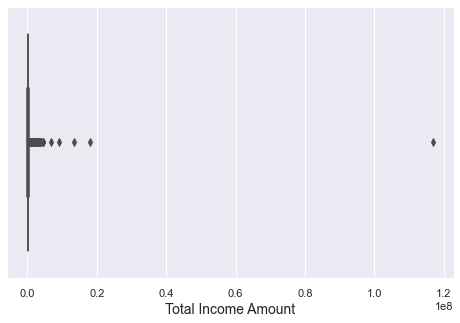

In [322]:
#plot the boxplot of AMT_INCOME_TOTAL column
plt.figure(figsize=(8,5))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.xlabel('Total Income Amount', size=14)
plt.show()

In [323]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL column
app_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [324]:
#Remove the outlier in AMT_INCOME_TOTAL
app_data = app_data[app_data.AMT_INCOME_TOTAL<500000]

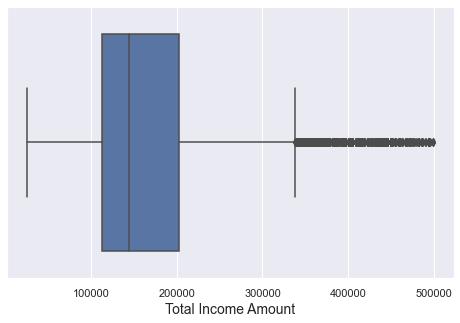

In [325]:
#plot the boxplot of AMT_INCOME_TOTAL column
plt.figure(figsize=(8,5))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.xlabel('Total Income Amount', size=14)
plt.show()

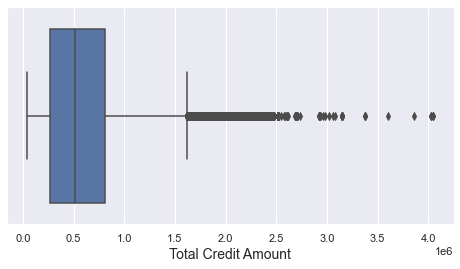

In [326]:
#plot the boxplot of AMT_CREDIT column
plt.figure(figsize=(8,4))
sns.boxplot(app_data.AMT_CREDIT)
plt.xlabel('Total Credit Amount', size=14)
plt.show()

### <u>MERGING Both Datasets

In [327]:
app_data.shape

(304803, 122)

In [328]:
prev_data.shape

(1667927, 37)

### Application Data and Previous data are merged together based on "SK_ID_CURR" column.

In [329]:
#application data and prev data are merged together based on "SK_ID_CURR" and stored in app_data variable again
app_data = pd.merge(app_data, prev_data,on=['SK_ID_CURR'])

In [330]:
app_data.shape

(1401226, 158)

In [331]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

### Bifurcate Data w.r.t Target=0 (Clients w/o Payment Difficulties) and Target=1(Clients with Payment Difficulties)

In [332]:
#Data without Payment Difficulties
target0_data = app_data[app_data.TARGET==0] 

#Data with Payment Difficulties
target1_data = app_data[app_data.TARGET==1]

### <u>UNIVARIATE ANALYSIS

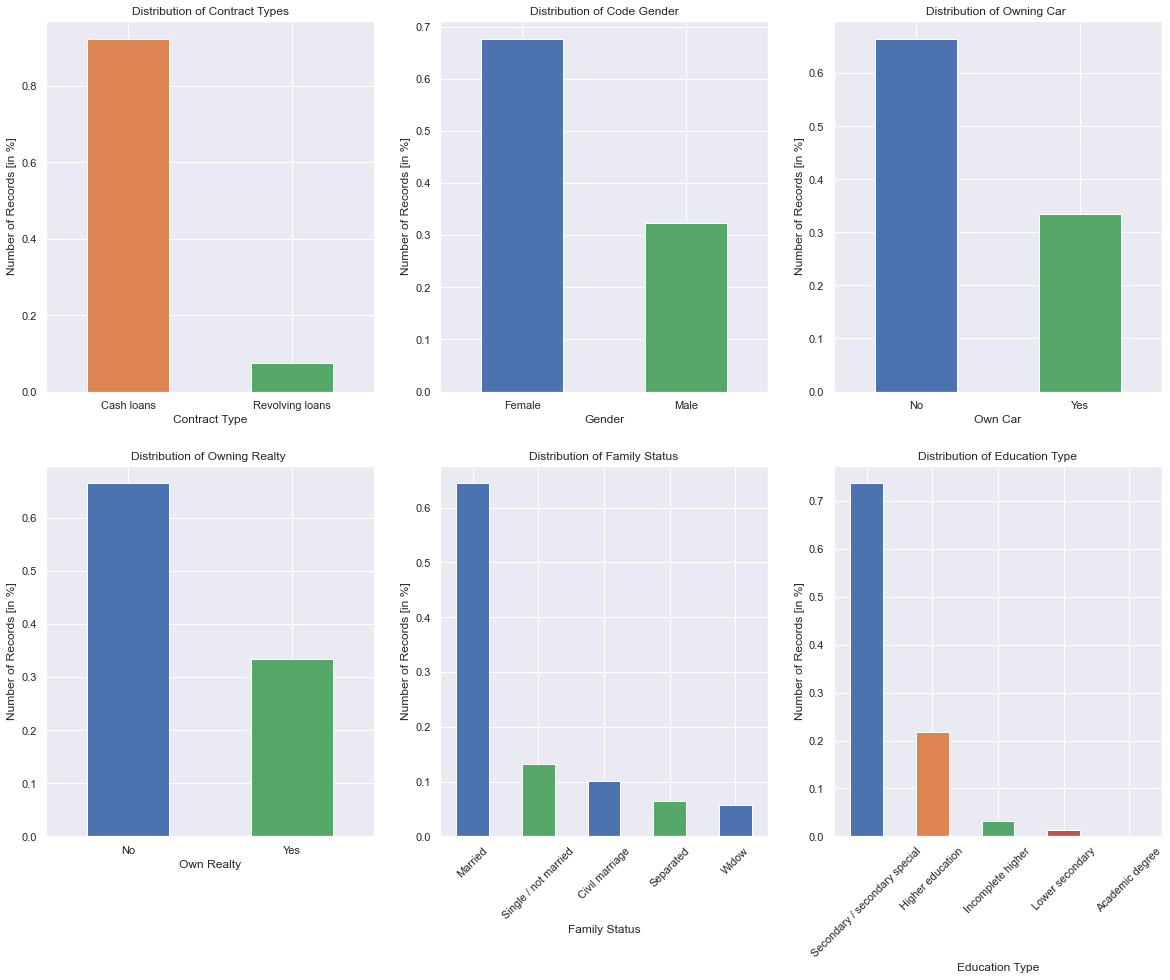

In [333]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
app_data.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.bar(color = ['C1','C2'])
plt.xticks(rotation=0)
plt.title("Distribution of Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Number of Records [in %]")

plt.subplot(2,3,2)
app_data.CODE_GENDER.value_counts(normalize=True).plot.bar(color = ['C0','C2'])
plt.xticks([0,1],['Female', 'Male'] , rotation=0)
plt.title("Distribution of Code Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Records [in %]")

plt.subplot(2,3,3)
app_data.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(color = ['C0','C2'])
plt.xticks([0,1],['No', 'Yes'] , rotation=0)
plt.title("Distribution of Owning Car ")
plt.xlabel("Own Car")
plt.ylabel("Number of Records [in %]")

plt.subplot(2,3,4)
app_data.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(color = ['C0','C2'])
plt.xticks([0,1],['No', 'Yes'] , rotation=0)
plt.title("Distribution of Owning Realty ")
plt.xlabel("Own Realty")
plt.ylabel("Number of Records [in %]")

plt.subplot(2,3,5)
app_data.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color = ['C0','C2'])
plt.xticks(rotation=45)
plt.title("Distribution of Family Status")
plt.xlabel("Family Status")
plt.ylabel("Number of Records [in %]")

plt.subplot(2,3,6)
app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color = ['C0','C1','C2','C3'])
plt.xticks(rotation=45)
plt.title("Distribution of Education Type")
plt.xlabel("Education Type")
plt.ylabel("Number of Records [in %]")

plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Customers prefer Cash Loans much more than Revolving Loans.
<h5><font color='orange'>2. More Female Customers apply for the Loan as compared to Male Customers.
<h5><font color='orange'>3. Customers owning Car or Realty are more likely to apply for the Loans.
<h5><font color='orange'>4. Number of Married Customers applying for loans are quite significant as compared to the Others.
<h5><font color='orange'>5. Customers with Secondary Education are more prominent to apply for the loans.

### <u>SEGMENTED UNIVARIATE ANALYSIS

### 1. Analysing NAME_CONTRACT_TYPE column

In [334]:
app_data.NAME_CONTRACT_TYPE_x.value_counts()

Cash loans         1295640
Revolving loans     105586
Name: NAME_CONTRACT_TYPE_x, dtype: int64

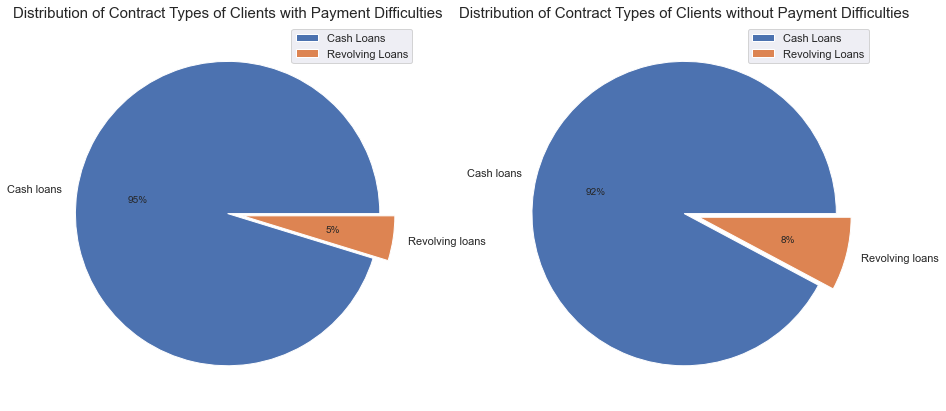

In [335]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
explode=(0,0.1)
target1_data.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%')
plt.legend(labels=['Cash Loans', 'Revolving Loans'], loc='upper right')
plt.title("Distribution of Contract Types of Clients with Payment Difficulties", size=15)
plt.ylabel('')

plt.subplot(1,2,2)
explode=(0,0.1)
target0_data.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%')
plt.legend(labels=['Cash Loans', 'Revolving Loans'], loc='upper right')
plt.title("Distribution of Contract Types of Clients without Payment Difficulties", size=15)
plt.ylabel('')
plt.show()

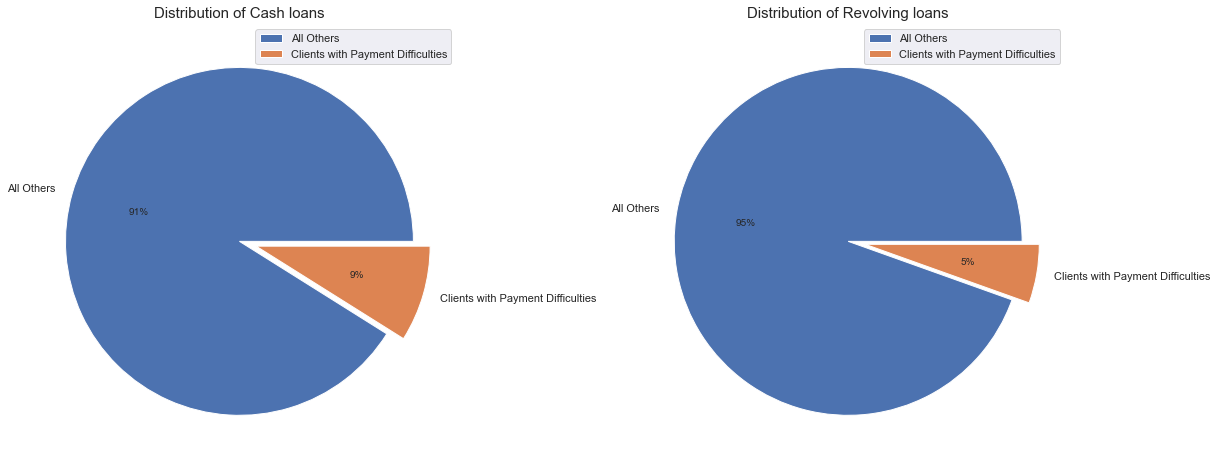

In [336]:
plt.figure(figsize=(20,8))
plabels=['All Others', 'Clients with Payment Difficulties']
plt.subplot(1,2,1)
explode=(0,0.1)
app_data[app_data.NAME_CONTRACT_TYPE_x=="Cash loans"]["TARGET"].value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%', labels=plabels)
plt.legend(labels=plabels, loc='upper right')
plt.title("Distribution of Cash loans", size=15)
plt.ylabel('')

plt.subplot(1,2,2)
explode=(0,0.1)
app_data[app_data.NAME_CONTRACT_TYPE_x=="Revolving loans"]["TARGET"].value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%', labels=plabels)
plt.legend(labels=plabels, loc='upper right')
plt.title("Distribution of Revolving loans", size=15)
plt.ylabel('')
plt.show()



### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Percentage of Payment Difficulties in Cash Loans are higher in comparison to Revolving Loans.

### 2. Analysing CODE_GENDER column

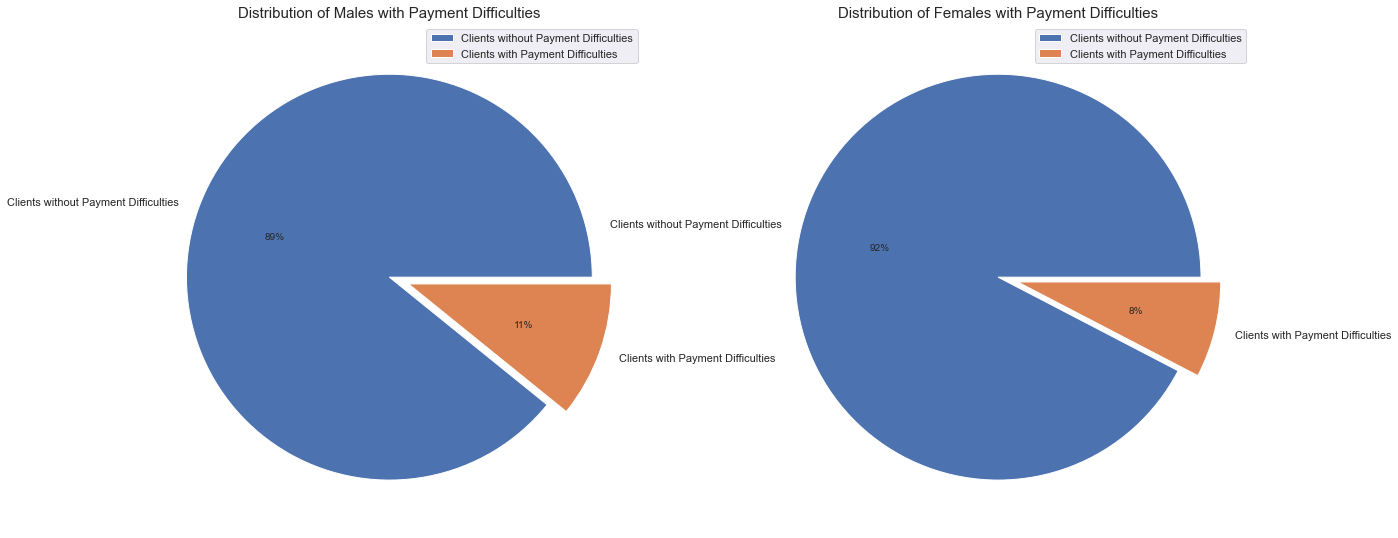

In [337]:
plt.figure(figsize=(20,10))
plabels=['Clients without Payment Difficulties', 'Clients with Payment Difficulties']
plt.subplot(1,2,1)
explode=(0,0.1)
app_data[app_data.CODE_GENDER=="M"]["TARGET"].value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%', labels=plabels)
plt.legend(labels=plabels, loc='upper right')
plt.title("Distribution of Males with Payment Difficulties", size=15)
plt.ylabel('')

plt.subplot(1,2,2)
explode=(0,0.1)
app_data[app_data.CODE_GENDER=="F"]["TARGET"].value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.0f%%', labels=plabels)
plt.legend(labels=plabels, loc='upper right')
plt.title("Distribution of Females with Payment Difficulties", size=15)
plt.ylabel('')
plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Percentage of Payment Difficulties by Males are higher as compared to Females.

### 3. Analysing NAME_EDUCATION_TYPE column

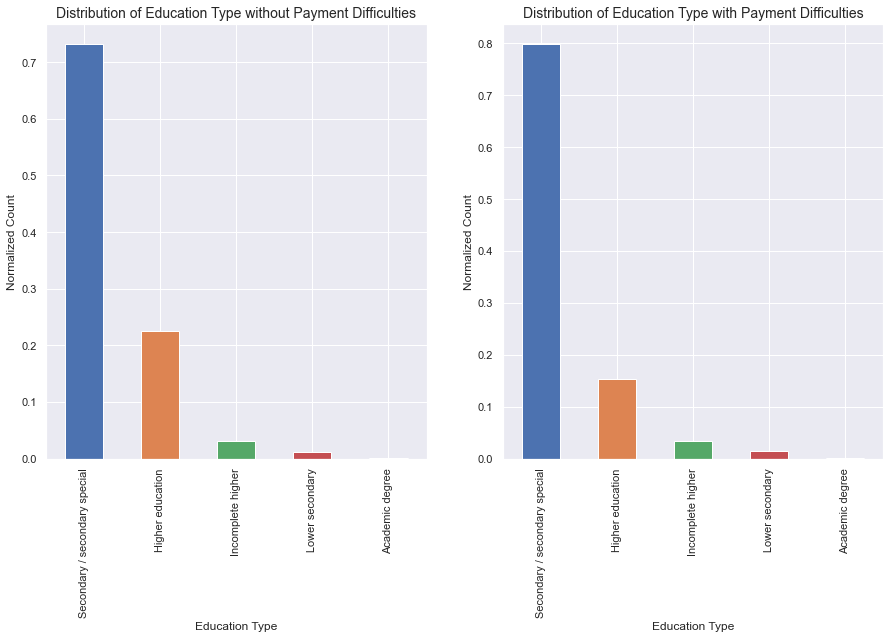

In [338]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
target0_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color=['C0','C1','C2','C3'])
plt.title("Distribution of Education Type without Payment Difficulties", size=14)
plt.ylabel('Normalized Count')
plt.xlabel('Education Type')

plt.subplot(1,2,2)
target1_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color=['C0','C1','C2','C3'])
plt.title("Distribution of Education Type with Payment Difficulties", size=14)
plt.ylabel('Normalized Count')
plt.xlabel('Education Type')
plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Percentage of Payment Difficulties in Cash Loans are higher in comparison to Revolving Loans.

### 4. Analysing NAME_FAMILY_STATUS column

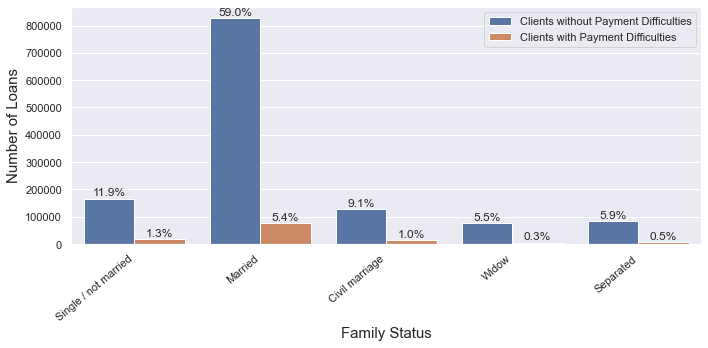

In [339]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
plabels=['Clients without Payment Difficulties', 'Clients with Payment Difficulties']
ax = sns.countplot(x=app_data.NAME_FAMILY_STATUS, hue=app_data.TARGET)
plt.xlabel('Family Status',size=15)
plt.ylabel('Number of Loans',size=15)
plt.legend(labels=plabels, loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

total = len(app_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. More Number of Married couples apply for Loans as compared to Others.

### 5. Analysing NAME_HOUSING_TYPE column

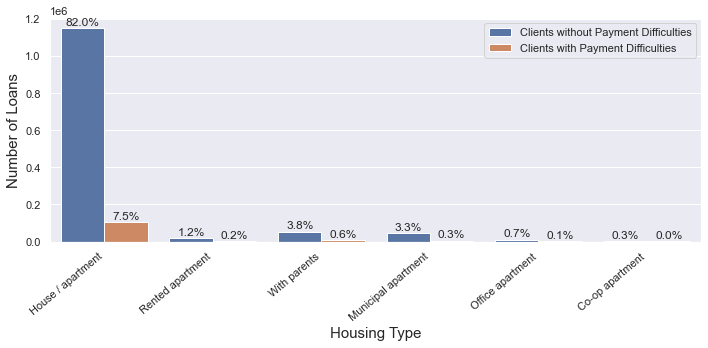

In [340]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
plabels=['Clients without Payment Difficulties', 'Clients with Payment Difficulties']
ax = sns.countplot(x=app_data.NAME_HOUSING_TYPE, hue=app_data.TARGET)
plt.xlabel('Housing Type',size=15)
plt.ylabel('Number of Loans',size=15)
plt.legend(labels=plabels, loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") 

total = len(app_data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Clients with House/Apartment apply for Loans as compared to Others.

### <u>MULTIVARIATE ANALYSIS

In [341]:
app_data.DAYS_BIRTH = abs(app_data.DAYS_BIRTH)
app_data.DAYS_EMPLOYED = abs(app_data.DAYS_EMPLOYED)

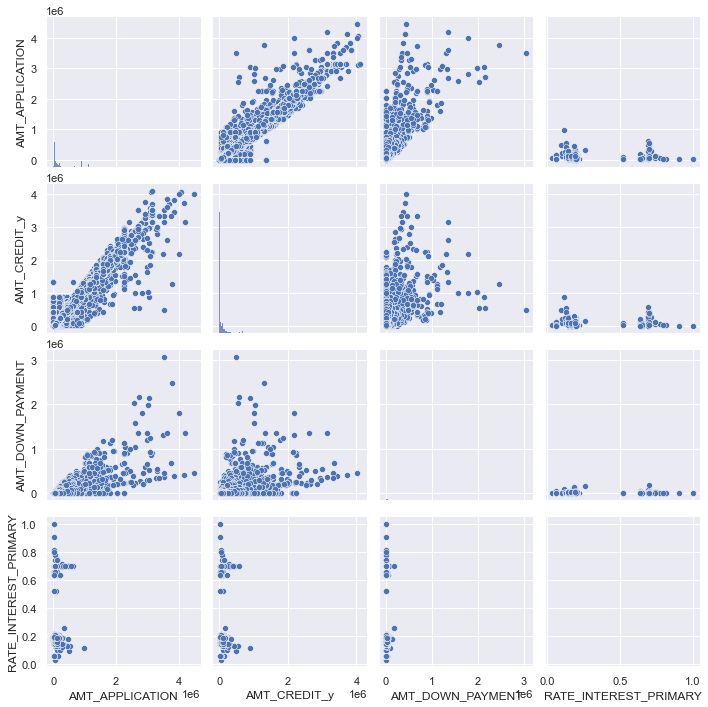

In [342]:
#Pair Plot on Previous Dataset columns. - ['AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIMARY']
sns.pairplot(app_data[['AMT_APPLICATION','AMT_CREDIT_y','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIMARY']])
plt.show()

### Inferences drawn from above Distributions:-
<h5><font color='orange'>1. Request Amount in application and Credit Amount on application increases in a Linear fashion.
<h5><font color='orange'>2. Rate of Interest primarily applied on Application amount is in Two clusters. This implies Rate of Interest is different for different Contract Types
<h5><font color='orange'>3. The amount of Down Payment is majorly similar accross all Application Amounts requested.

### Contract Type vs Education Type vs Application Amount

In [343]:
res1 = pd.pivot_table(data=app_data, index="NAME_CONTRACT_TYPE_x", columns="NAME_EDUCATION_TYPE", values="AMT_INCOME_TOTAL", aggfunc='mean')
res1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_CONTRACT_TYPE_x,,,,,
Cash loans,224129.629630,200775.757887,184514.541447,135325.115472,161242.669065
Revolving loans,263405.172414,182067.975998,158440.981752,133661.510353,144794.224890


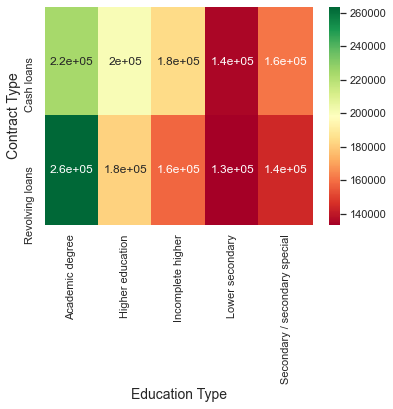

In [344]:
sns.heatmap(res1, annot=True, cmap="RdYlGn")
plt.xlabel('Education Type' , size=14)
plt.ylabel('Contract Type', size=14)
plt.show()

### Inferences drawn from above Distribution:-
<h5><font color='orange'>1. Clients with higher Education qualication are approved with Loans having more amount. 
<h5><font color='orange'>2. Loan Amounts approved for educated clients is 75% more than the others. 

### Contract Type vs Target vs Application Amount

In [345]:
res2 = pd.pivot_table(data=app_data, index="NAME_CONTRACT_TYPE_x", columns="TARGET", values="AMT_INCOME_TOTAL", aggfunc='mean' )
res2

TARGET,0,1
NAME_CONTRACT_TYPE_x,,
Cash loans,170484.609982,167000.630498
Revolving loans,155617.320692,144522.099879


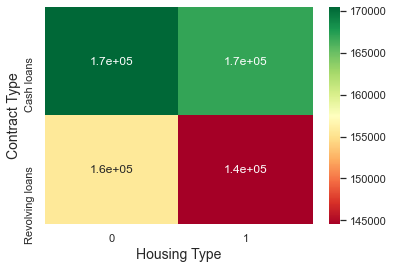

In [346]:
sns.heatmap(res2, annot=True, cmap="RdYlGn")
plt.xlabel('Housing Type' , size=14)
plt.ylabel('Contract Type', size=14)
plt.show()

### Inferences drawn from above Distribution:-
<h5><font color='orange'>1. Probability that Clients will have Payment Difficulties is higher in Revolving Loans than Cash Loans even if Lesser Loan Amount Application is approved for a client.

### Payment Type vs Contract Status vs Application Amount

In [347]:
res3 = pd.pivot_table(data=app_data, index="NAME_PAYMENT_TYPE", columns="NAME_CONTRACT_STATUS", values="AMT_APPLICATION", aggfunc='mean')
res3

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_PAYMENT_TYPE,,,,
Cash through the bank,188564.796805,663526.959728,399136.663300,68855.618061
Cashless from the account of the employer,152332.662377,525000.000000,330458.287229,51950.148750
Non-cash from your account,120931.031913,846924.532258,315227.238881,64546.449828
XNA,139713.878072,16507.913876,193154.561857,104552.512723


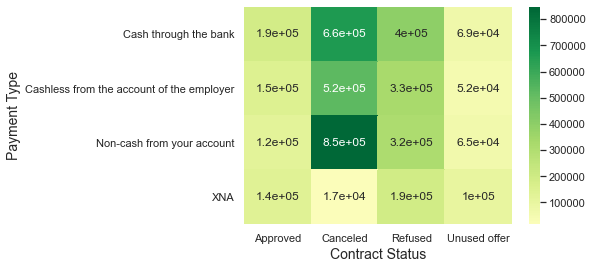

In [348]:
sns.heatmap(res3, annot=True, cmap="RdYlGn", center=0.5)
plt.xlabel('Contract Status' , size=14)
plt.ylabel('Payment Type', size=14)
plt.show()

### Inferences drawn from above Distribution:-
<h5><font color='orange'>1. Chances of Loan getting Approved for All Payment Types is much higher when Loan Amount is less than 500000. 
<h5><font color='orange'>2. Chances of Loan getting Canceled for Non-Cash from your account is much higher when Loan Amount is more than than 500000.
<h5><font color='orange'>3. There are lot of Refused or Unused Offers due to some reason. 